In [3]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Helper plotting functions
import numpy as np
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Supervised learning with Scikit-Learn

Scikit-learn : https://scikit-learn.org/

Given, $N$ training examples
$\{(x_1,y_1),\dots,(x_N,y_N)\}$

Where $x_i$ is the feature vector $\phi(x_{input})$ of the i-th example and the corresponding target (label for classification) is $y_i$.

We seek a function $f:X\rightarrow Y$ for $f\in \mathbf{F}$

This is a **classification** task if $y_i$ is a integer or string, and we want a discrete class output from $f$

Or a **regression** task if $y_i$ is a real valued float, and we want an continous output from $f$

## Iris Dataset

In [5]:
from sklearn import datasets
# iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris = datasets.load_iris()
# np.unique(iris_y)
# iris_dataset.feature_names
iris_df_all = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

iris_df = pd.DataFrame(data= iris['data'],
                      columns= iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


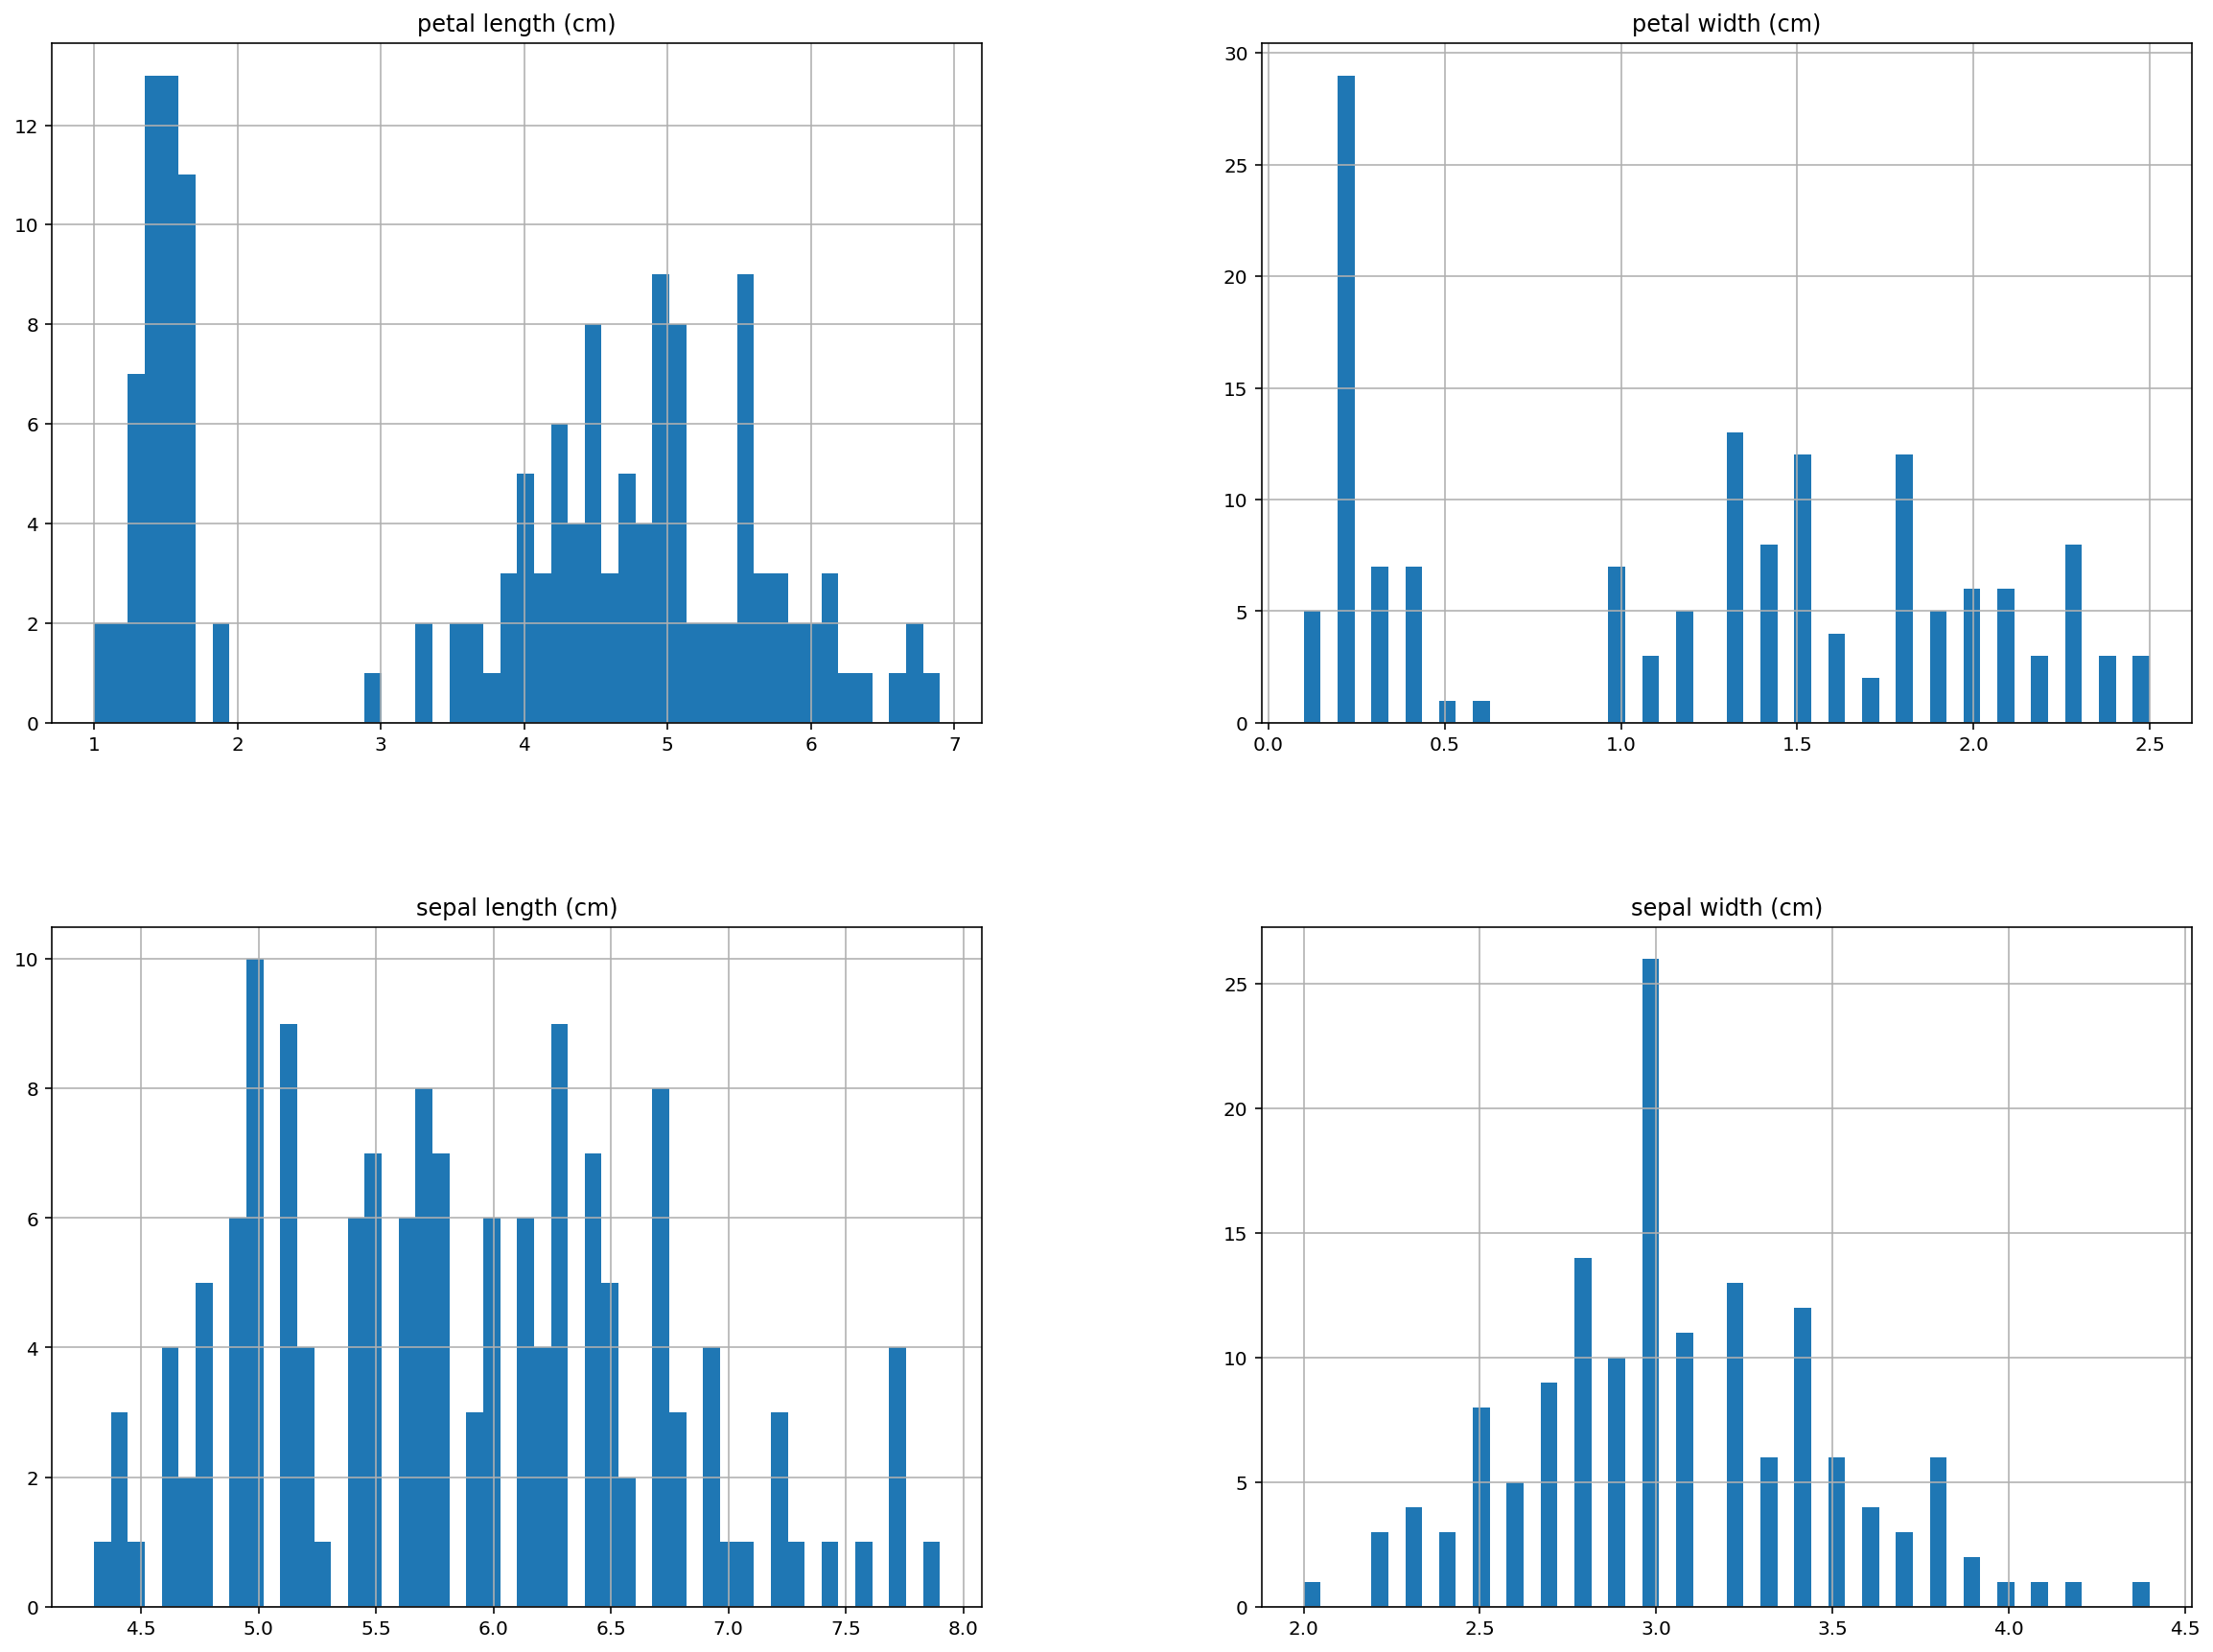

In [5]:
iris_df.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Correlation Coefficients for various datasets;

Where correlation $ = \rho_{X,Y} = \operatorname{corr}(X,Y) = {\operatorname{cov}(X,Y) \over \sigma_X \sigma_Y} = {\operatorname{E}[(X-\mu_X)(Y-\mu_Y)] \over \sigma_X\sigma_Y} $

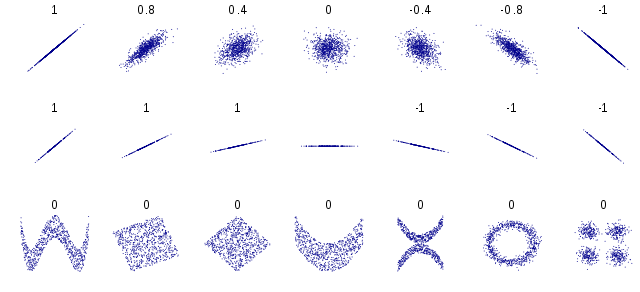

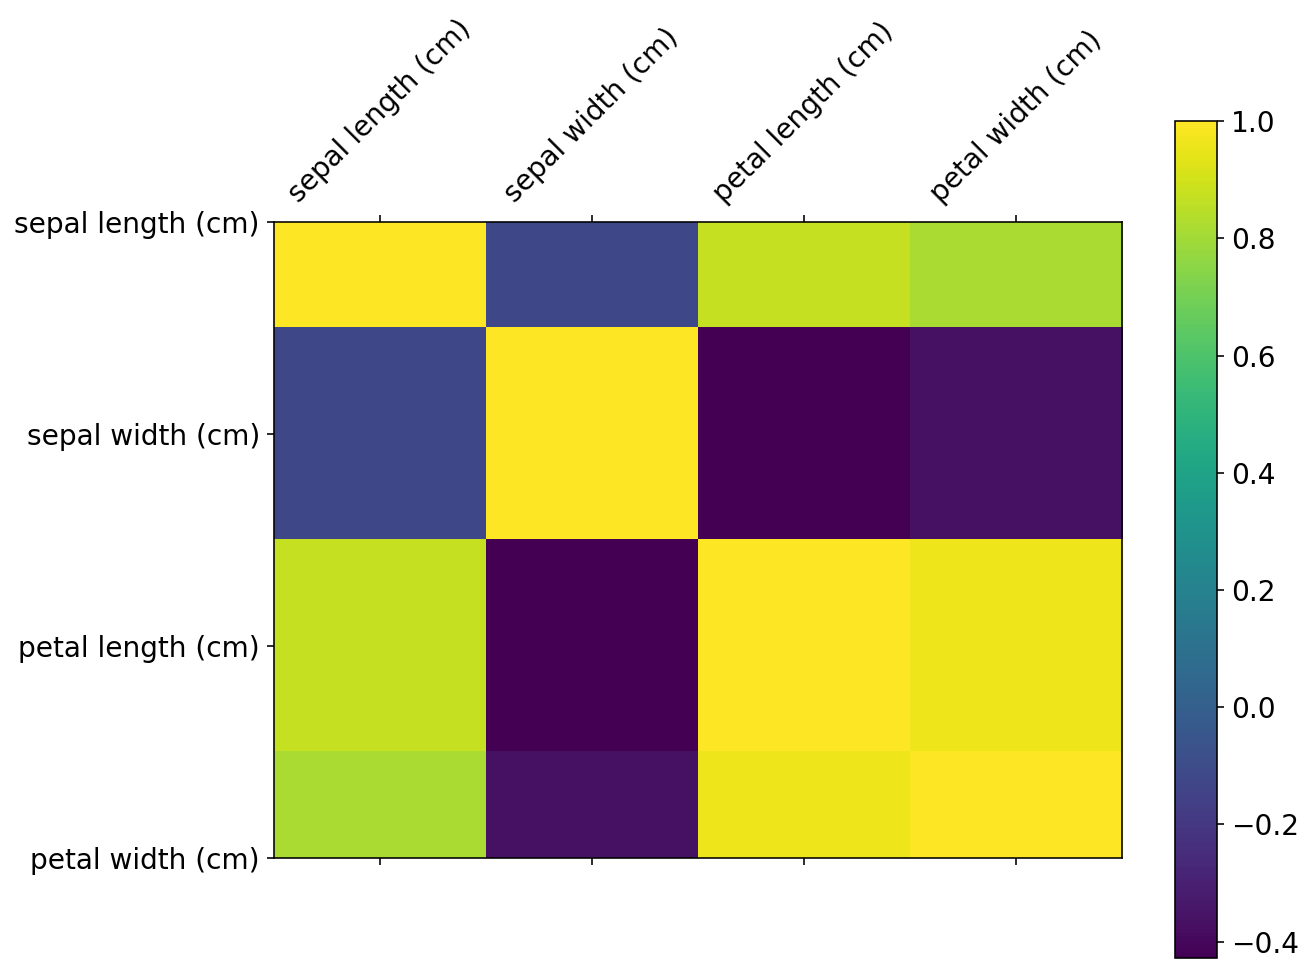

In [7]:
# Coloured Correlation Matrix
scale_ratio = 0.5
f = plt.figure(figsize=(19*scale_ratio, 15*scale_ratio))
plt.matshow(iris_df.corr(), fignum=f.number)
plt.xticks(range(iris_df.shape[1]), iris_df.columns, fontsize=14, rotation=45)
plt.yticks(range(iris_df.shape[1]), iris_df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

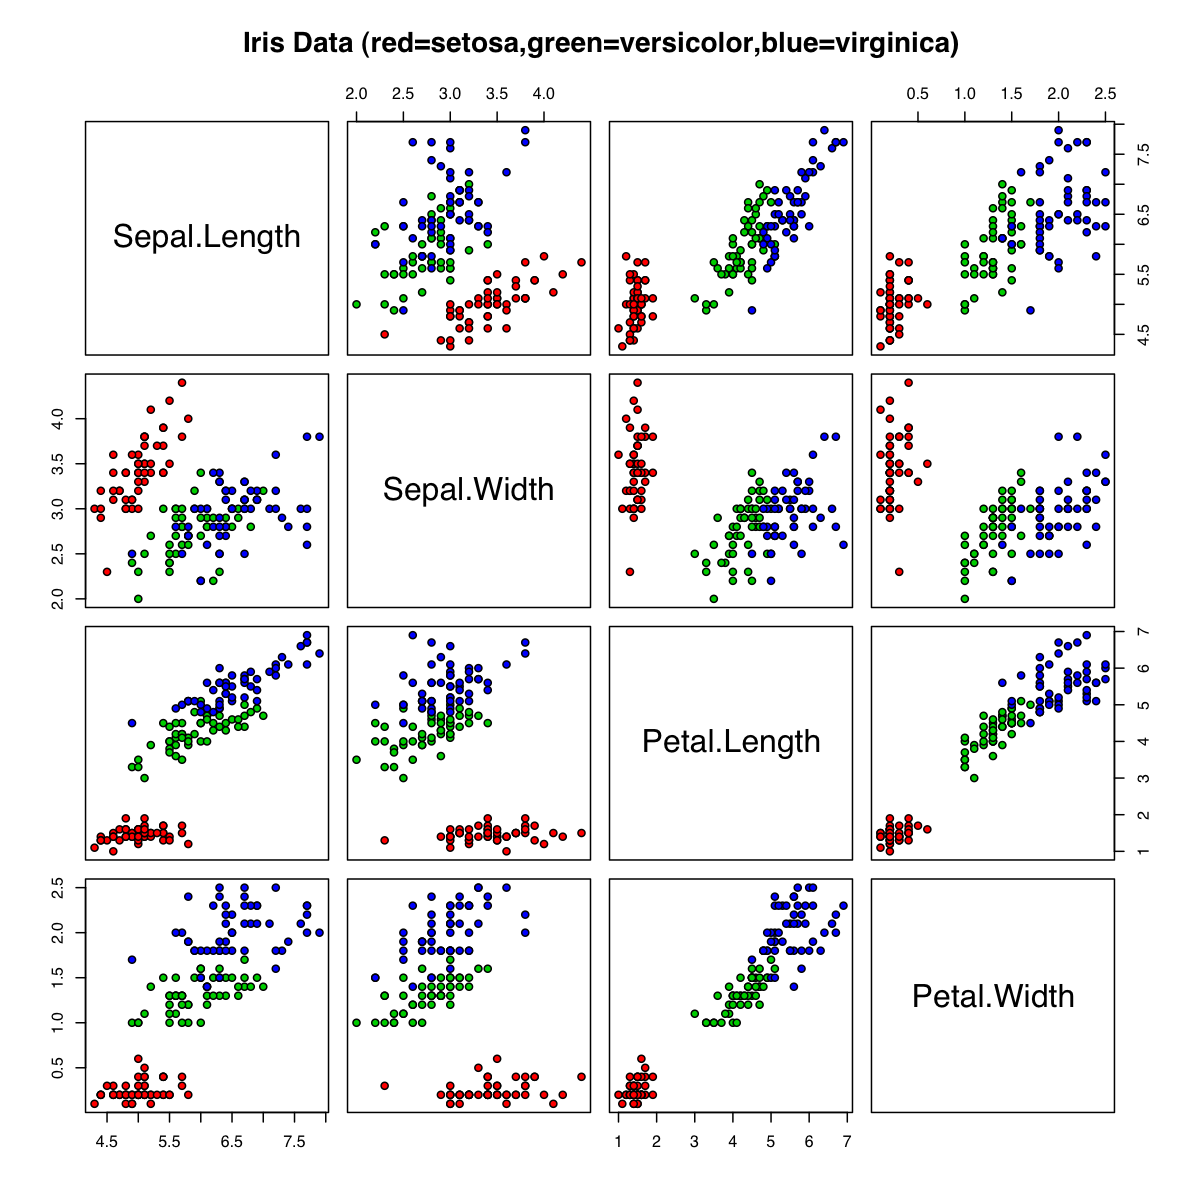
Ref: https://commons.wikimedia.org/wiki/File:Anderson%27s_Iris_data_set.png

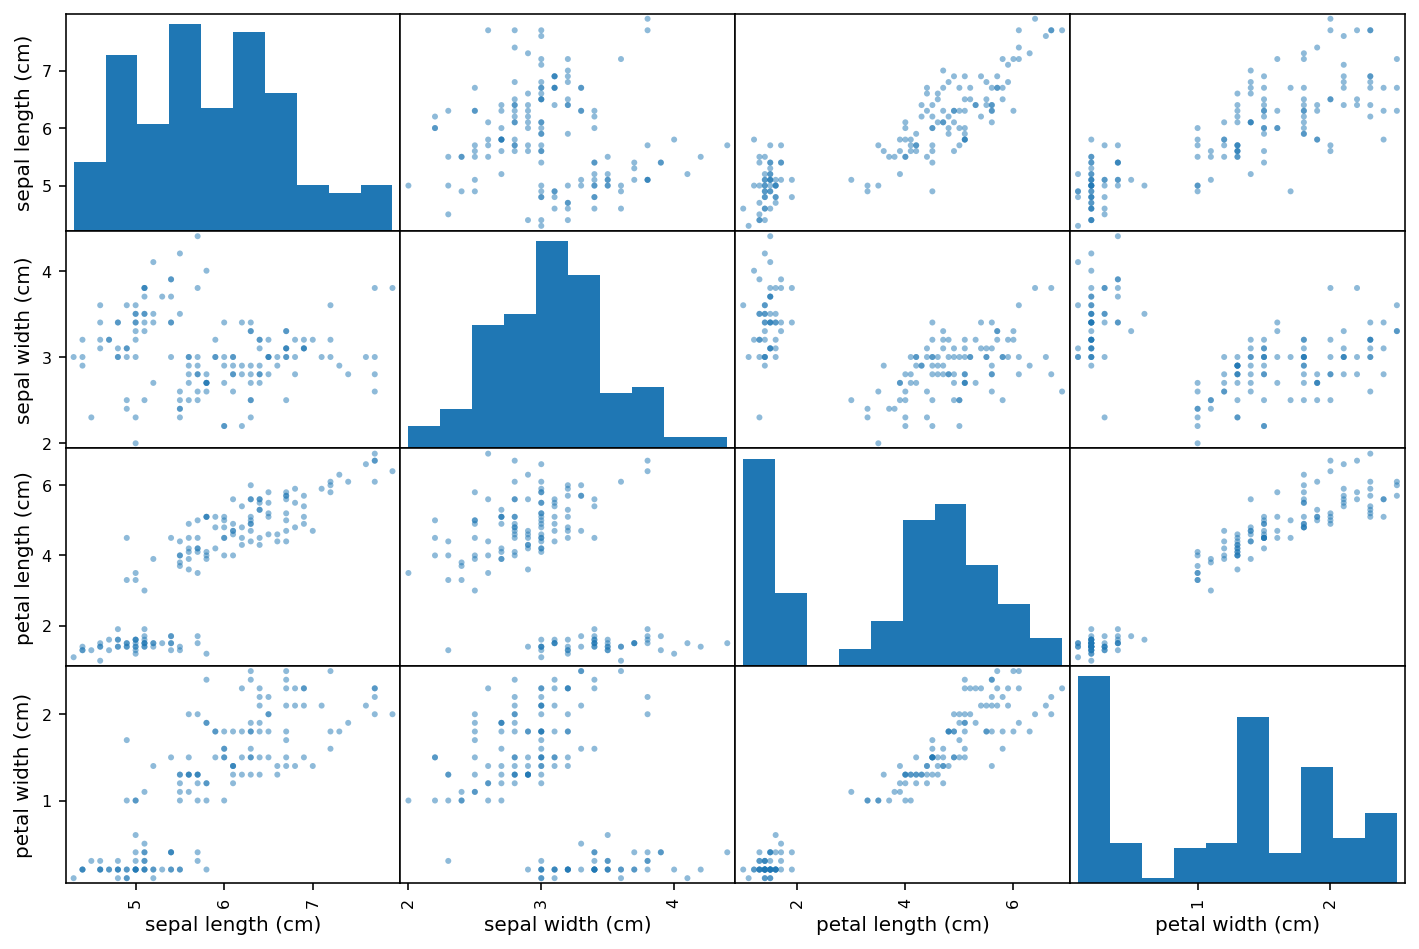

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(12,8))
plt.show()

## k-Nearest neighbors classifier

k-NN is a non-parametric method. The input consists of the $k$ closest training examples in the feature space. It works for both classification and regression, however the output varies:

* Classification : Assigned to the most common class amongst its $k$ nearest neighbors
* Regression : Average of the values of $k$ nearest neighbors

It is type of instance-based learning, and sensitive to the distance function and local structure of the data

A suitable starting distance function is the Euclidean distance : $d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$ 
, other measures can be more suitable for a given setting and include the Manhattan, Chebyshev and Hamming distance.

For classification, it estimates the conditional probabilty for each class, i.e. the fraction of points closes to $x$ ($A$) with that given class label 

$P(y = j | X = x) = \frac{1}{K} \sum_{i \in \mathcal{A}} I(y^{(i)} = j)$

The output gets assigned to the class with the largest probability



Can split our labelled samples into: (for illustration)
* $60\%$ - train set
* $40\%$ - test set

In [7]:
# Split iris data in train, validate and test data
# A random permutation, to split the data randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df_all.to_numpy()[:,:-1], iris_df_all.to_numpy()[:,-1:].ravel(), test_size=0.40, random_state=99, shuffle=True)

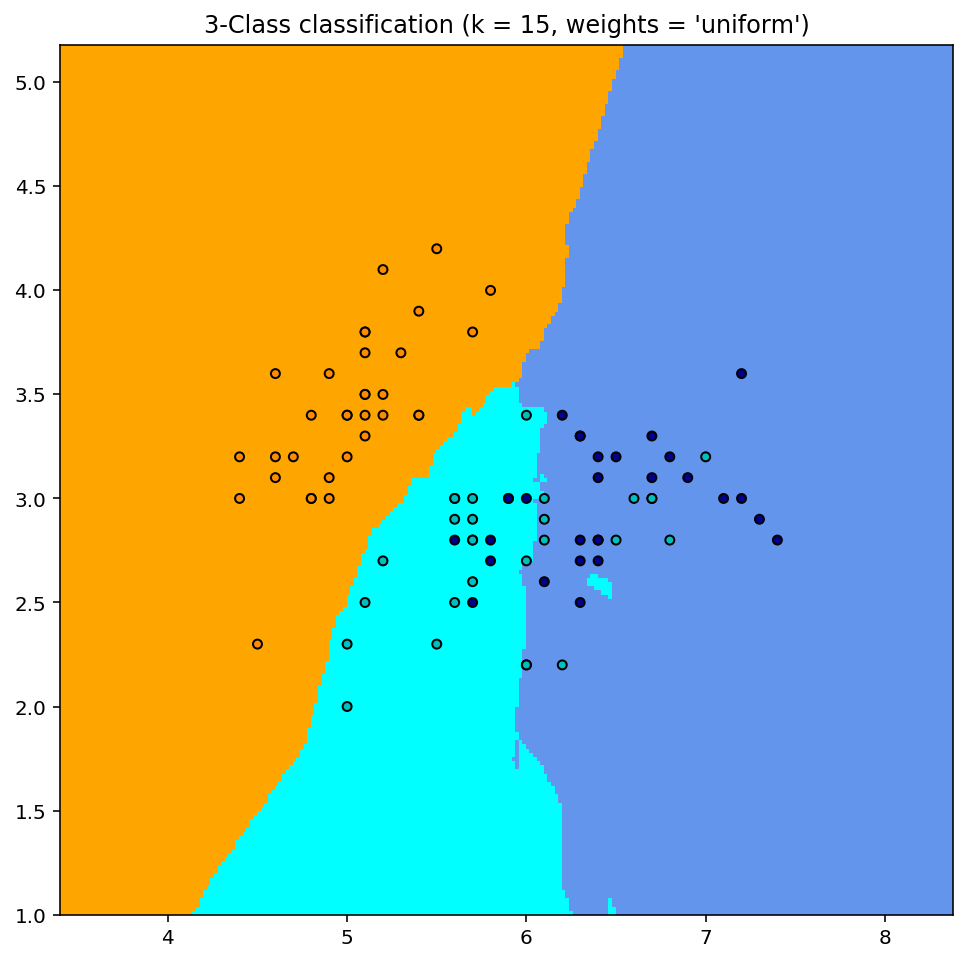

In [8]:
## Aside : Plot the decision boundary
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
def plot_knn_decision_boundary():
    n_neighbors = 15
    weight = 'uniform'

    # Color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    X_t = X_train[:,:2] # Take the first two features for plotting in 2D
    h = 0.02 # Step size in mesh
    knn_p = KNeighborsClassifier(n_neighbors, weight)
    knn_p.fit(X_t, y_train)

    x_min, x_max = X_t[:, 0].min() - 1, X_t[:, 0].max() + 1
    y_min, y_max = X_t[:, 1].min() - 1, X_t[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_p.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_t[:, 0], X_t[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'uniform'))
    plt.show()
    
plot_knn_decision_boundary()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
Accuracy : 95.0 

Confusion Matrix: 
 [[17  0  0]
 [ 0 20  2]
 [ 0  1 20]]


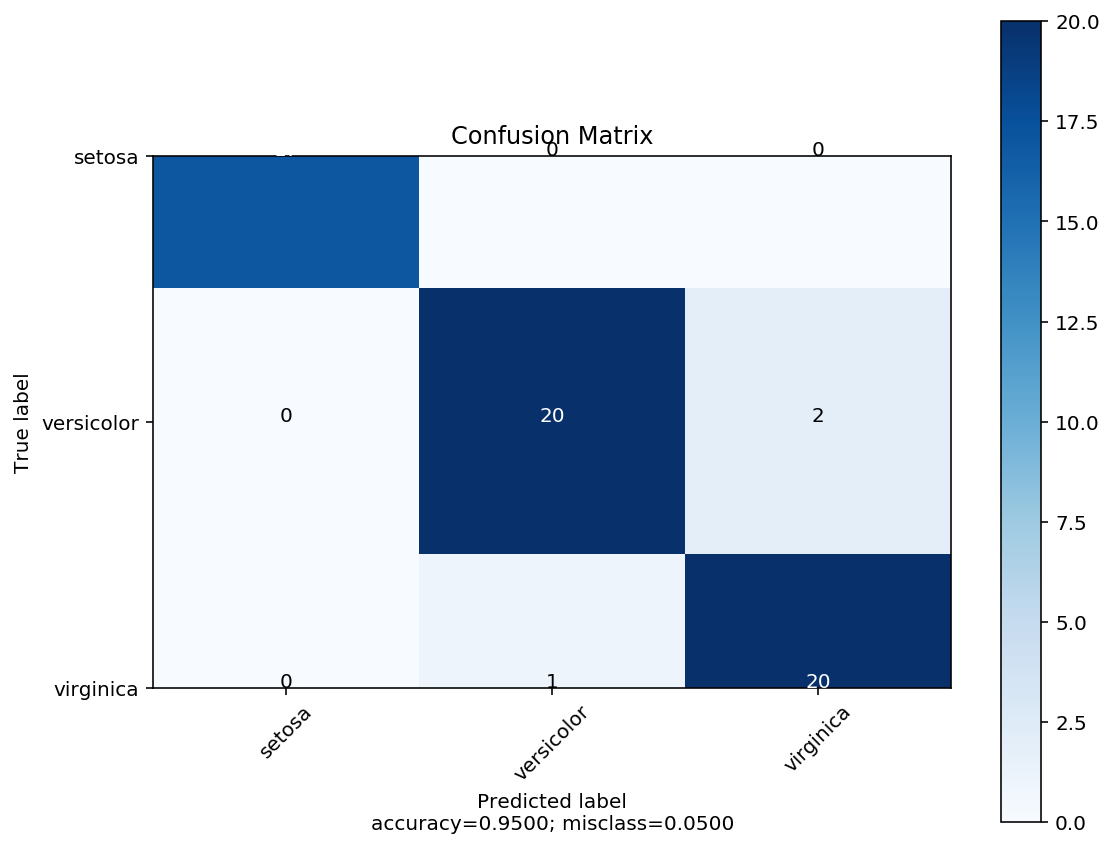

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Create and fit a nearest-neighbor classifier
def create_example_knn():
    n_neighbors = 2
    knn = KNeighborsClassifier(n_neighbors, metric='euclidean')
    print(knn.fit(X_train, y_train))
    y_test_predict = knn.predict(X_test)
    print('Accuracy : {} \n'.format(100 * accuracy_score(y_test, y_test_predict)))
    print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test, y_test_predict)))
    plot_confusion_matrix(cm=confusion_matrix(y_test, y_test_predict),
                      normalize=False,
                      target_names=iris.target_names,
                      title='Confusion Matrix')

create_example_knn()

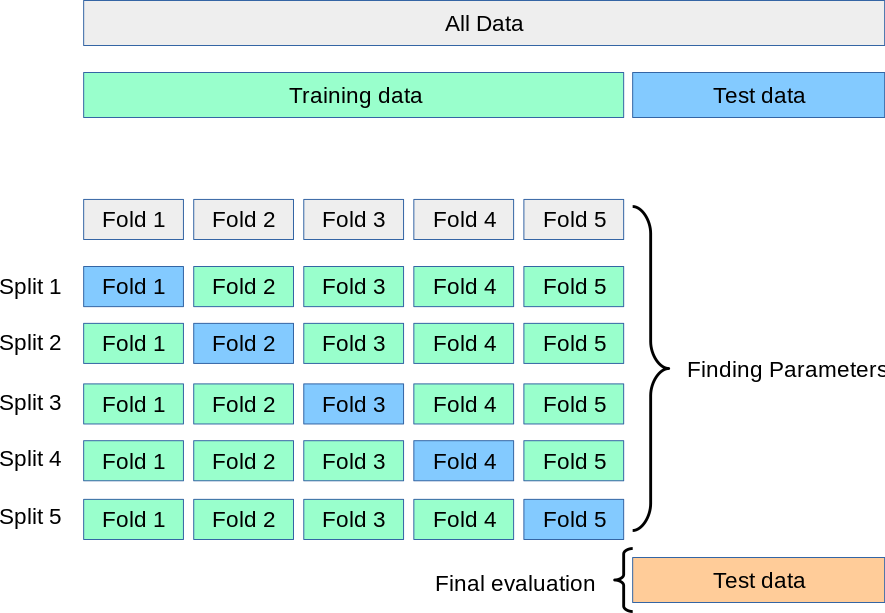

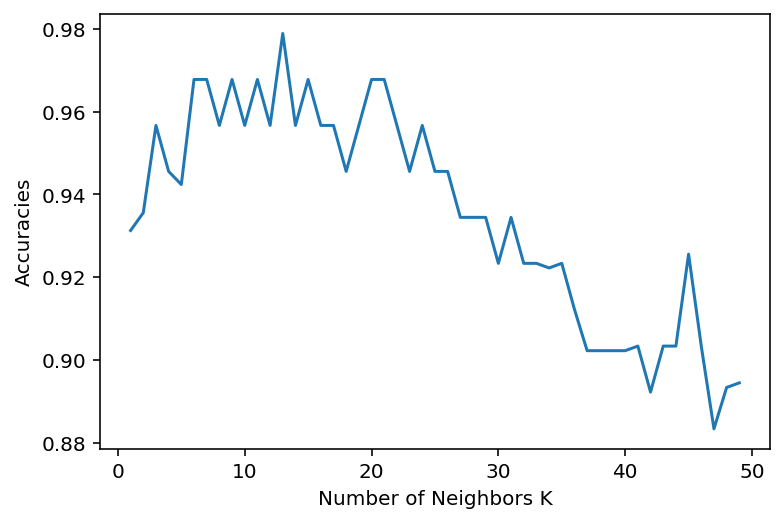

Optimal K: 13 with CV Score of 0.9788888888888888


In [10]:
from sklearn.model_selection import cross_val_score
def find_optimal_k():
    cv_accuracies = []
    k_values = list(range(1,50))
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracies = cross_val_score(knn, X_train, y_train, cv=10)
        cv_accuracies.append(accuracies.mean())

    plt.plot(k_values, cv_accuracies)
    plt.xlabel("Number of Neighbors K")
    plt.ylabel("Accuracies")
    plt.show()

    optimal_k = k_values[cv_accuracies.index(max(cv_accuracies))]
    print('Optimal K: {} with CV Score of {}'.format(optimal_k, max(cv_accuracies)))
    
find_optimal_k()

What about other distance metrics too ? 

| identifier    | class name          | args    | distance function                          |
|---------------|---------------------|---------|--------------------------------------------|
| “euclidean”   | EuclideanDistance   |         | $\sqrt{\sum{(x - y)^2}}$                   |
| “manhattan”   | ManhattanDistance   |         | $\sum{|x - y|}$                            |
| “chebyshev”   | ChebyshevDistance   |         | $\max{|x - y|}$                            |
| “minkowski”   | MinkowskiDistance   | p       | $\left(\sum |x-y|^p\right)^\frac{1}{p} $   |
| “wminkowski”  | WMinkowskiDistance  | p, w    | $\left(\sum |w(x-y)|^p\right)^\frac{1}{p}$ | 
| “seuclidean”  | SEuclideanDistance  | V       | $\sqrt{\frac{\sum{(x - y)^2}}{V}}$         |
| “mahalanobis” | MahalanobisDistance | V or VI | $\sqrt{(x - y)^T V^{-1} (x-y)}$            | 

In [11]:
def find_optimal_k_and_distance():
    distances = ['euclidean', 'manhattan', 'chebyshev']
    k_values = list(range(1,50))

    cv_results = {}
    max_accuracy = 0

    for distance in distances:
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
            accuracy = cross_val_score(knn, X_train, y_train, cv=10).mean()
            cv_results[(distance, k)] = accuracy
            if accuracy > max_accuracy + 0.000001:
                max_accuracy = accuracy
                max_params = (distance, k)

    print('Optimal hyperparameters: {}'.format(max_params))
    print('With CV Score of {}'.format(max_accuracy))
    return max_params

max_params = find_optimal_k_and_distance()

Optimal hyperparameters: ('euclidean', 13)
With CV Score of 0.9788888888888888


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
Accuracy : 98.33333333333333 

Confusion Matrix: 
 [[17  0  0]
 [ 0 22  0]
 [ 0  1 20]]


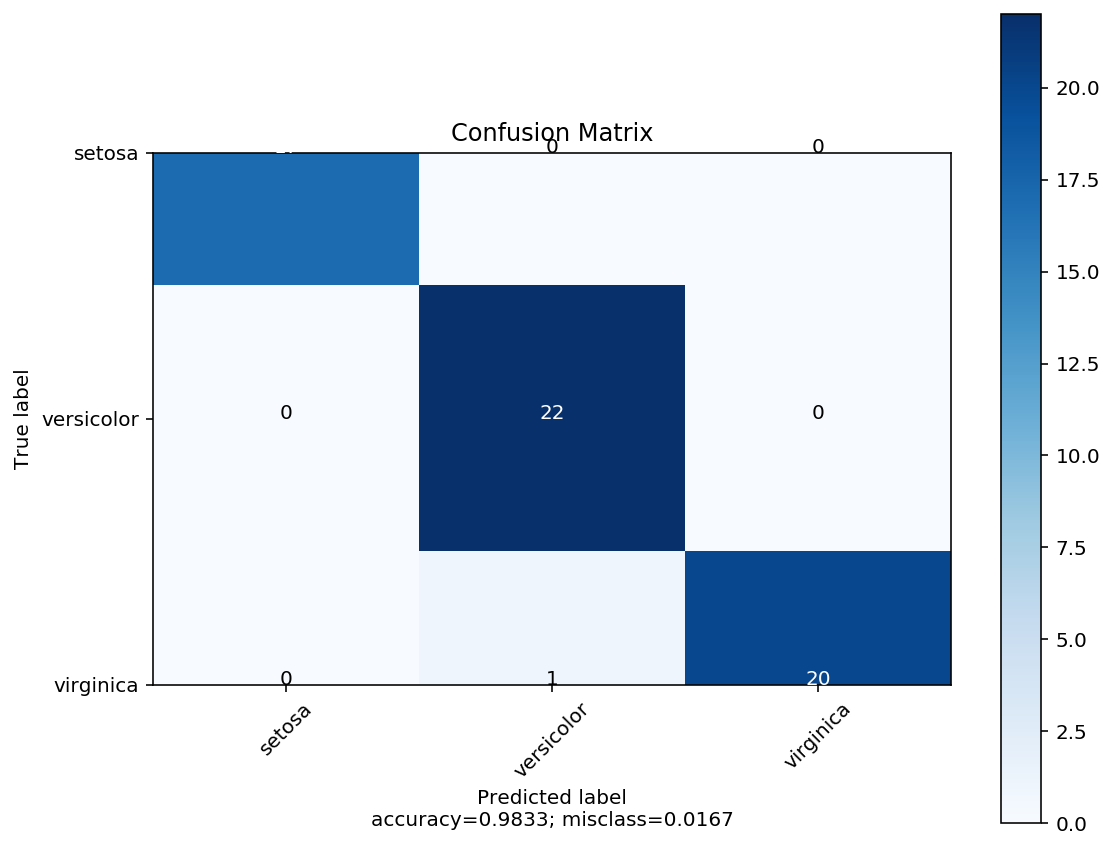

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [12]:

# Lets train our model with our optimal hyper parameters
def train_and_test_final_model(max_params):
    (distance, k) = max_params
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
    knn.fit(X_train, y_train)
    print(knn)
    y_test_predict = knn.predict(X_test)
    print('Accuracy : {} \n'.format(100 * accuracy_score(y_test, y_test_predict)))
    print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test, y_test_predict)))
    plot_confusion_matrix(cm=confusion_matrix(y_test, y_test_predict),
                      normalize=False,
                      target_names=iris.target_names,
                      title='Confusion Matrix')
    return knn

train_and_test_final_model(max_params)

## k-Nearest neighbors regression

When the output labels are continous rather than discrete. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors. i.e. $y_{output}=\frac{1}{K}\sum_i y_{i}$

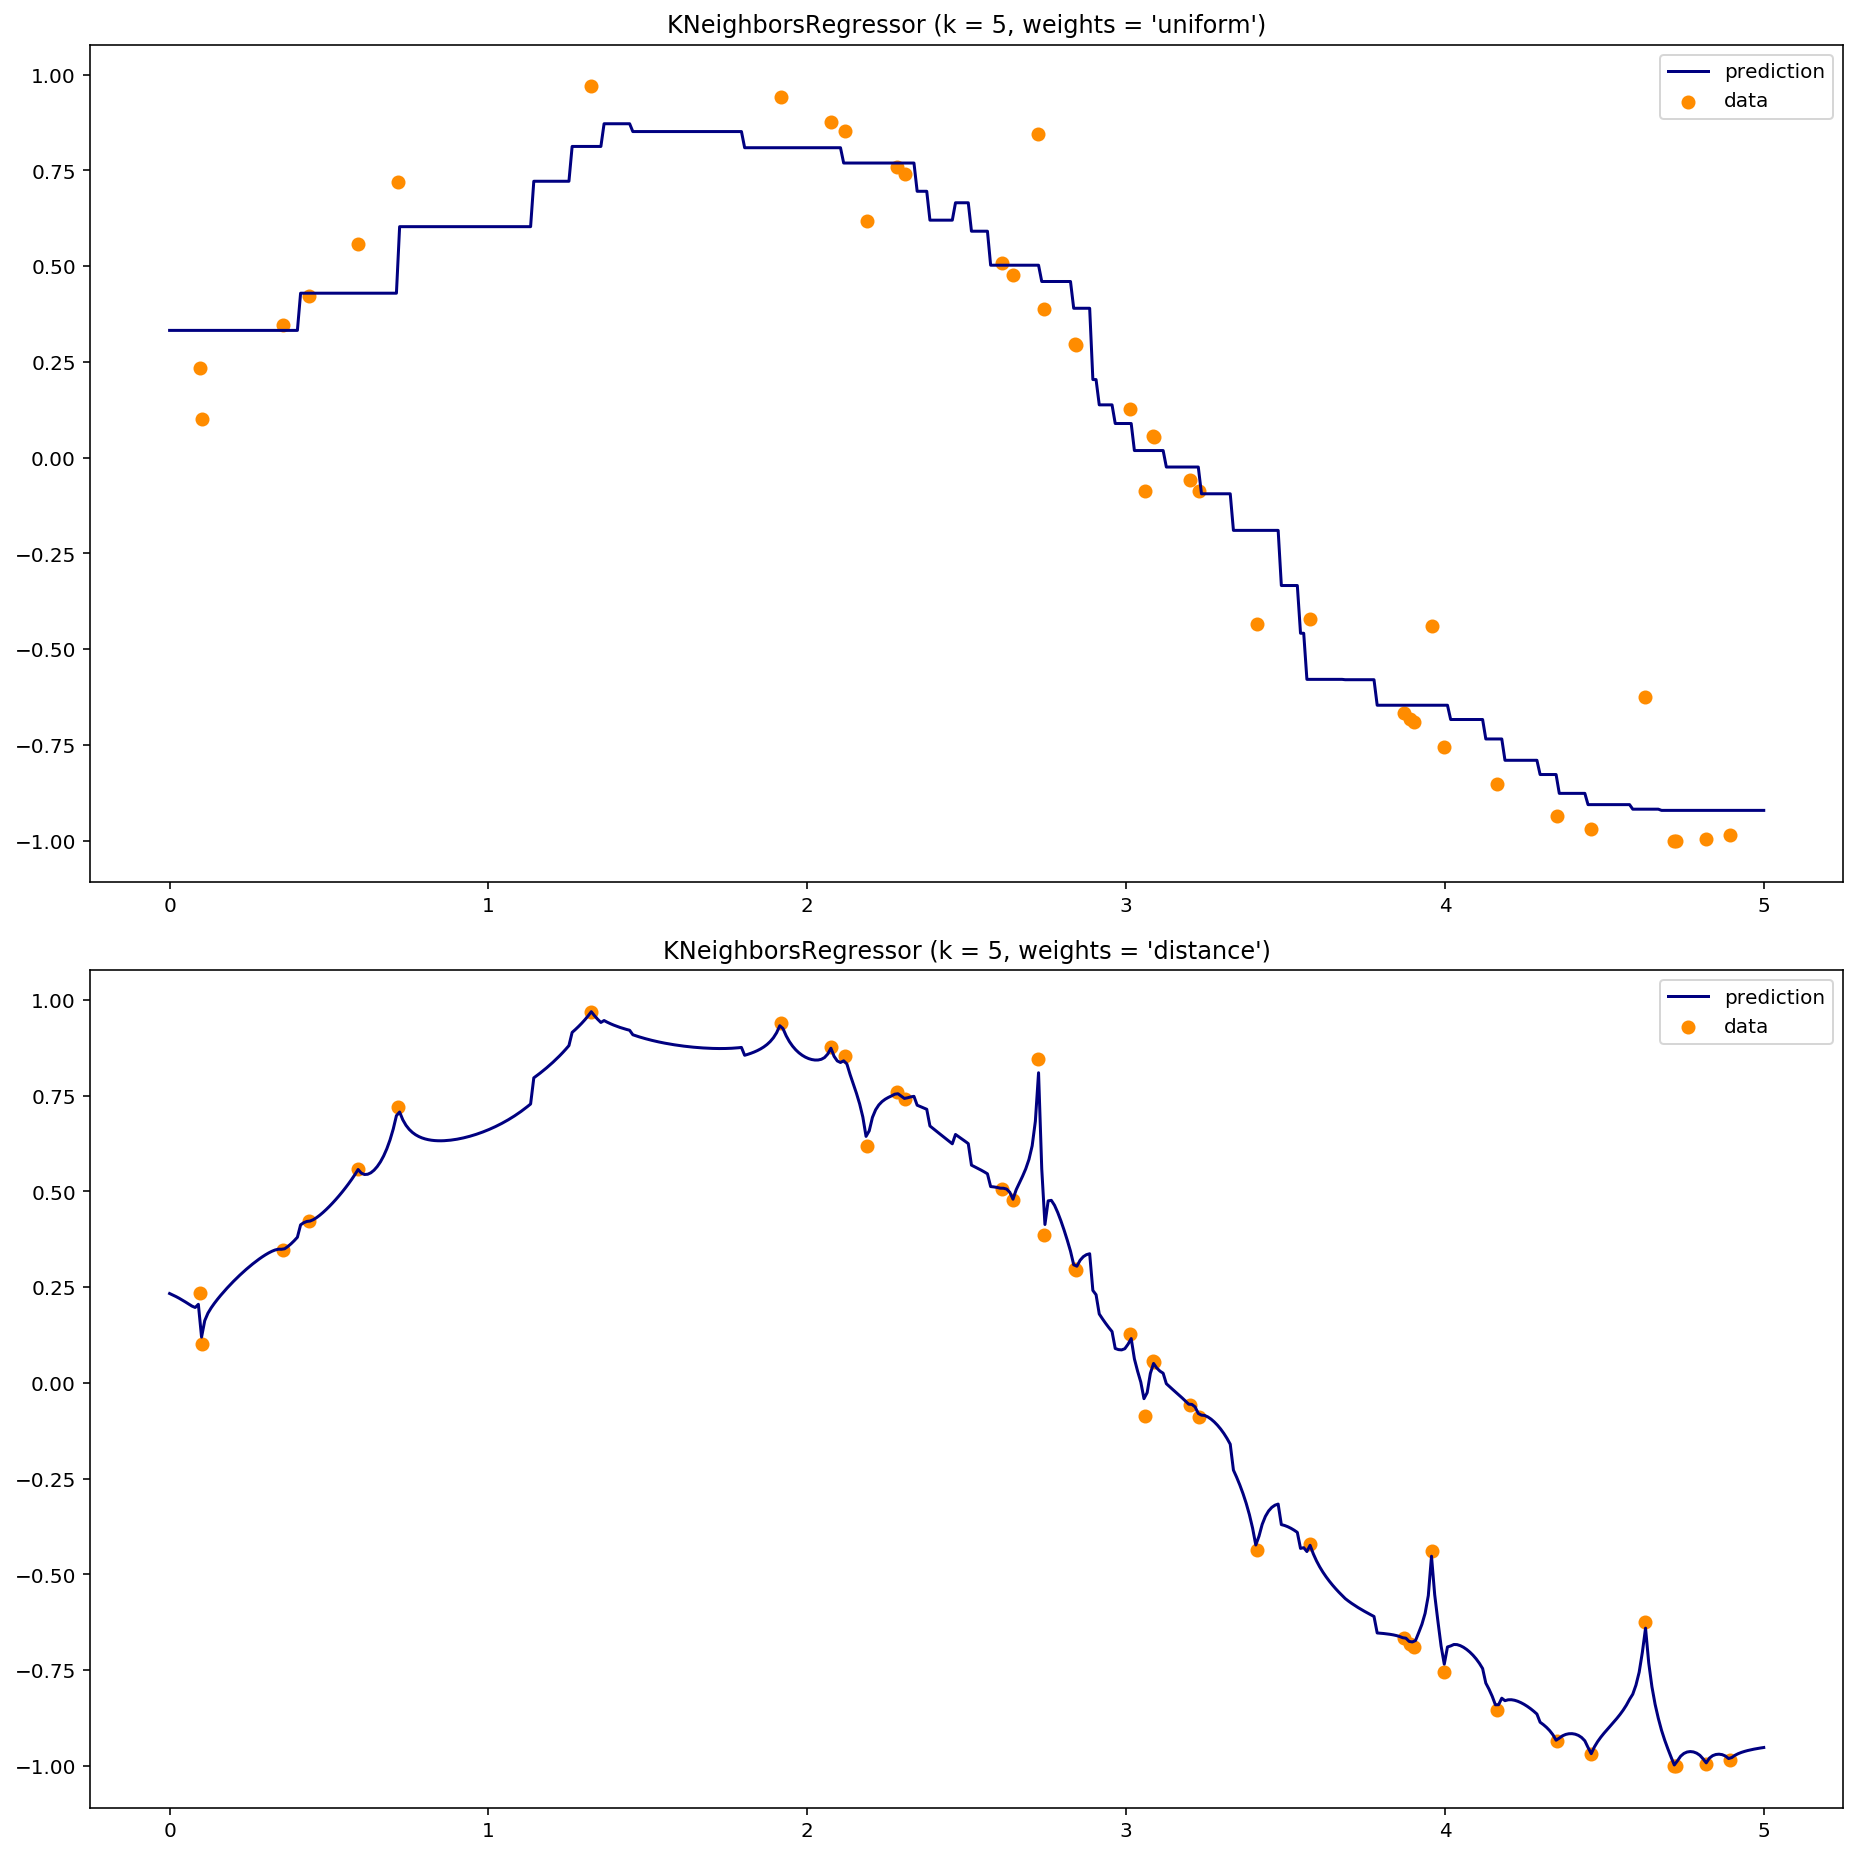

In [13]:
from sklearn.neighbors import KNeighborsRegressor

def plt_knn_regression():
    # Generate sample data
    np.random.seed(0)
    X = np.sort(5 * np.random.rand(40, 1), axis=0)
    T = np.linspace(0, 5, 500)[:, np.newaxis]
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(8)) # Add normally distributed noise to output

    # Fit regression model
    n_neighbors = 5
    f = plt.figure(figsize=(13, 13))
    
    for i, weights in enumerate(['uniform', 'distance']):
        knn = KNeighborsRegressor(n_neighbors, weights=weights)
        y_ = knn.fit(X, y).predict(T)
        plt.subplot(2, 1, i + 1)
        plt.scatter(X, y, color='darkorange', label='data')
        plt.plot(T, y_, color='navy', label='prediction')
        plt.axis('tight')
        plt.legend()
        plt.title("KNeighborsRegressor (k = {}, weights = '{}')".format(n_neighbors,
                                                                    weights))
    plt.tight_layout()
    plt.show()

plt_knn_regression()